In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
# from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "_"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"

df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

## Questão 19
Caso houvesse dados com os perfis abaixo, qual seria a opinião dos alunos da TYU sobre seus cursos de acordo com os dados. JUSTIFIQUEM!

### a) Curso: Engenharia Civil; Renda: mais que 2 salários mínimos; Turno: Diurno.

Muito insatisfeito     0.000000
Insatisfeito           7.317073
Indiferente           39.024390
Satisfeito            48.780488
Muito satisfeito       4.878049
Name: Opinião, dtype: float64
Muito insatisfeito     0
Insatisfeito           3
Indiferente           16
Satisfeito            20
Muito satisfeito       2
Name: Opinião, dtype: int64
Total: 41


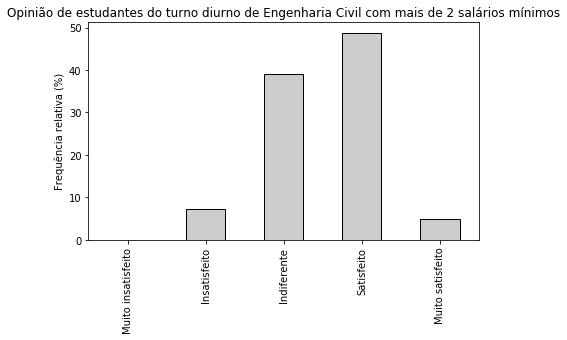

In [2]:
df_19a = df.where(df["Curso"]=="Civil").where(df["Renda"] > 2).where(df["Turno"]=="Diurno").dropna()
df_19a_count = df_19a["Opinião"].value_counts()
df_19a_count.loc["Muito insatisfeito"] = 0
df_19a_count = df_19a_count.reindex(["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"])
df_19a_count_p = df_19a_count.div(0.01*df_19a_count.sum(), axis=0)
ax = df_19a_count_p.plot(kind="bar", color=default_color, edgecolor = "black", figsize=(7,4), title="Opinião de estudantes do turno diurno de Engenharia Civil com mais de 2 salários mínimos")
ax.set_ylabel("Frequência relativa (%)")
# Salva figura na pasta dedicada
plt.savefig('Figuras\Q19a.png', bbox_inches='tight', dpi=dpi)

print(df_19a_count_p)
print(df_19a_count)
print("Total: " + str(df_19a_count.sum()))

### b) Curso: Engenharia Mecânica; Renda: menos do que 4 salários mínimos; Turno: Noturno.

Muito insatisfeito     0.000000
Insatisfeito           0.000000
Indiferente           13.513514
Satisfeito            45.945946
Muito satisfeito      40.540541
Name: Opinião, dtype: float64
Muito insatisfeito     0
Insatisfeito           0
Indiferente           10
Satisfeito            34
Muito satisfeito      30
Name: Opinião, dtype: int64
Total: 74


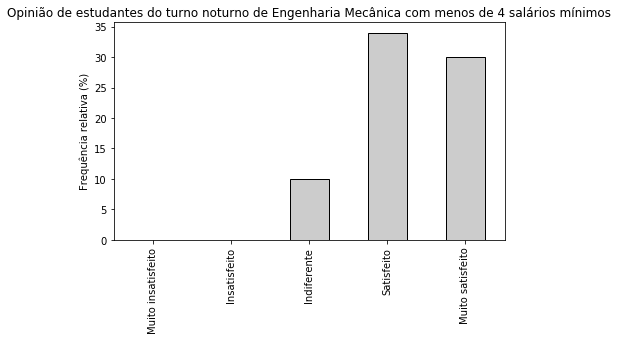

In [3]:
# Filtra os dados
df_19b = df.where(df["Curso"]=="Mecânica").where(df["Renda"] < 4).where(df["Turno"]=="Noturno").dropna()
# Faz a contagem de opiniões iguais
df_19b_count = df_19b["Opinião"].value_counts()
# Insere linhas faltantes por não conter itens
df_19b_count.loc["Muito insatisfeito"] = 0
df_19b_count.loc["Insatisfeito"] = 0
# Arruma a ordem das linhas
df_19b_count = df_19b_count.reindex(["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"])
# Calcula frequencia relativa
df_19b_count_p = df_19b_count.div(0.01*df_19b_count.sum(), axis=0)
# Plota o gráfico de colunas
ax = df_19b_count.plot(kind="bar", color=default_color, edgecolor = "black", figsize=(7,4), title="Opinião de estudantes do turno noturno de Engenharia Mecânica com menos de 4 salários mínimos")
ax.set_ylabel("Frequência relativa (%)")
# Salva figura na pasta dedicada
plt.savefig('Figuras\Q19b.png', bbox_inches='tight', dpi=dpi)

print(df_19b_count_p)
print(df_19b_count)
print("Total: " + str(df_19b_count.sum()))

### c) Curso: Engenharia Química; Renda: mais que 3 salários mínimos; Turno: Integral.

Muito insatisfeito    29.268293
Insatisfeito          57.317073
Indiferente            9.756098
Satisfeito             3.658537
Muito satisfeito       0.000000
Name: Opinião, dtype: float64
Muito insatisfeito    24
Insatisfeito          47
Indiferente            8
Satisfeito             3
Muito satisfeito       0
Name: Opinião, dtype: int64
Total: 82


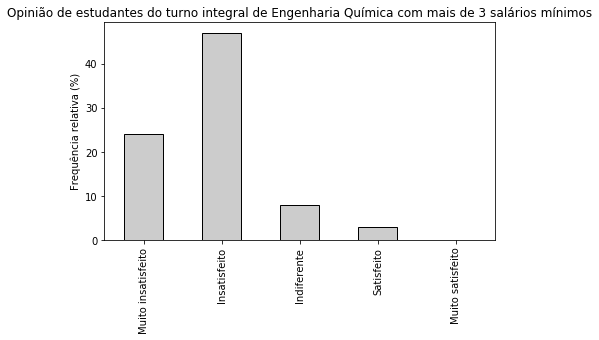

In [4]:
# Filtra os dados
df_19c = df.where(df["Curso"]=="Química").where(df["Renda"] > 3).where(df["Turno"]=="Integral").dropna()
# Faz a contagem de opiniões iguais
df_19c_count = df_19c["Opinião"].value_counts()
# Insere linhas faltantes por não conter itens
df_19c_count.loc["Muito satisfeito"] = 0
# Arruma a ordem das linhas
df_19c_count = df_19c_count.reindex(["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"])
# Calcula frequencia relativa
df_19c_count_p = df_19c_count.div(0.01*df_19c_count.sum(), axis=0)
# Plota o gráfico de colunas
ax= df_19c_count.plot(kind="bar", color=default_color, edgecolor = "black", figsize=(7,4), title="Opinião de estudantes do turno integral de Engenharia Química com mais de 3 salários mínimos")
ax.set_ylabel("Frequência relativa (%)")
# Salva figura na pasta dedicada
plt.savefig('Figuras\Q19c.png', bbox_inches='tight', dpi=dpi)

print(df_19c_count_p)
print(df_19c_count)
print("Total: " + str(df_19c_count.sum()))

## Questão 20
Que outras variáveis vocês creem necessárias para caracterizar adequadamente as opiniões dos alunos dos cursos de engenharia da TYU (sugira pelo menos duas)? JUSTIFIQUEM!

## Questão 21
Há alguma outra análise que você gostaria de fazer com as variáveis existentes (sugira pelo menos duas) para analisar melhor as opiniões dos alunos dos cursos de engenharia da TYU? Por quê?

## Questão 22
Realize as análises sugeridas e apresente as conclusões, JUSTIFICANDO-AS.
Os melhores alunos são os mais satisfeitos (Opinião vs IAA)?


In [5]:
# df_22a = df.copy()
# df_22a["OpiniãoNum"] = df["Opinião"].dropna().apply(lambda x: ["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"].index(x))
# # df_22a_mean = df_22a.groupby([pd.cut(df["IAA"], np.arange(0,10,0.01))])["OpiniãoNum"].mean()#.unstack(fill_value=0)
# df_22a_mean = df_22a.groupby([pd.cut(df["IAA"], np.arange(0,10,1))])["OpiniãoNum"].mean()
# df_22a_std  = df_22a.groupby([pd.cut(df["IAA"], np.arange(0,10,1))])["OpiniãoNum"].std()

# # axes = df_22a_mean.plot(kind='bar', yerr=df_22a_std, color=default_color, subplots=True, grid=True, layout=(2,3), legend=False, sharex=True, ylim=(0,4), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")
# df_22a_mean.plot(kind='bar', color=default_color, yerr=df_22a_std.T, subplots=True, grid=True, edgecolor = "black", legend=False, sharex=True, ylim=(0,4), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")

In [6]:
# df_22a_mean = df.groupby("Opinião")["IAA"].mean()[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# df_22a_std = df.groupby("Opinião")["IAA"].std()[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]

# # axes = df_22a_mean.plot(kind='bar', yerr=df_22a_std, color=default_color, subplots=True, grid=True, layout=(2,3), legend=False, sharex=True, ylim=(0,4), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")
# df_22a_mean.plot(kind='bar', color=default_color, yerr=df_22a_std, subplots=True, grid=True, edgecolor = "black", legend=False, sharex=True, ylim=(0,10), sharey=True, figsize=(6,4), title="Relação entre cursos e renda sobre a opinião")

# plt.savefig('Figuras\Q22a.png', bbox_inches='tight', dpi=dpi)


c:\users\rafael\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


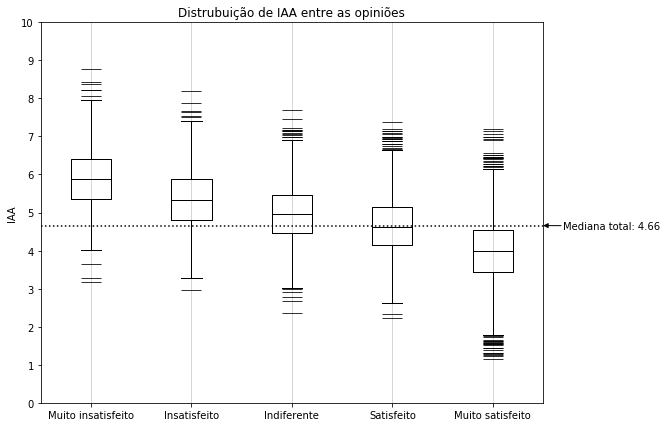

In [7]:
mediana_total = df["IAA"].median()

fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

# df22a = pd.DataFrame({col:vals["IAA"] for col, vals in df.groupby("Opinião")})[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# bplot = ax.boxplot(df22a[df22a.columns[0]])
bplot = ax.boxplot([df[df["Opinião"]=="Muito insatisfeito"]["IAA"], df[df["Opinião"]=="Insatisfeito"]["IAA"], df[df["Opinião"]=="Indiferente"]["IAA"], df[df["Opinião"]=="Satisfeito"]["IAA"], df[df["Opinião"]=="Muito satisfeito"]["IAA"],], widths=0.4)

# bplot = ax.boxplot([df[df["Curso"]=="Elétrica"]["IAA"], df[df["Curso"]=="Computação"]["IAA"], df[df["Curso"]=="Civil"]["IAA"], df[df["Curso"]=="Química"]["IAA"], df[df["Curso"]=="Produção"]["IAA"], df[df["Curso"]=="Mecânica"]["IAA"]], vert=False, widths=0.4)
ax.set_xticklabels(["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"])
ax.set_ylabel("IAA")
ax.set_title("Distrubuição de IAA entre as opiniões")
ax.set_ybound(0,10)
ax.set_yticks(np.arange(0, 11, 1))
ax.grid(which='major', axis="x", color=default_grid_color)

for line in bplot['medians']:
    line.set(color="black")
        
for flier in bplot['fliers']:
    flier.set(marker=default_box_marker, alpha=default_box_marker_alpha, markersize=default_box_marker_size)

    
# Insere anotação sobre a linha de média
ax.annotate('Mediana total: {:0.2f}'.format(mediana_total), xy=(5.5, mediana_total/10), xytext=(20, 0),
    xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
    arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0),)
        
        
# Insere linhas de tendência central
ax.axhline(y=mediana_total, color='black', linestyle=':',  linewidth=1.5)

plt.savefig('Figuras\Q22a.png', bbox_inches='tight', dpi=dpi)


## 22.b Os alunos mais abastados são os que tem maiores IAAs (Renda vs IAA)

In [8]:
# ## bins = [0, 1, 1.5, 2, 4, 8, 16, 25] 
# bins = np.arange(0,11,0.5)
# df_22b_median = df.groupby([pd.cut(df["IAA"], bins)])["Renda"].median()
# df_22b_mean = df.groupby([pd.cut(df["IAA"], bins)])["Renda"].mean()
# df_22b_std  = df.groupby([pd.cut(df["IAA"], bins)])["Renda"].std()

# df_22b_median.plot(kind='bar', color=default_color, yerr=df_22b_std, subplots=True, grid=True, edgecolor = "black", legend=False, sharex=True, xlim=(0,10), sharey=True, figsize=(13,7), title="Relação entre cursos e renda sobre a opinião")


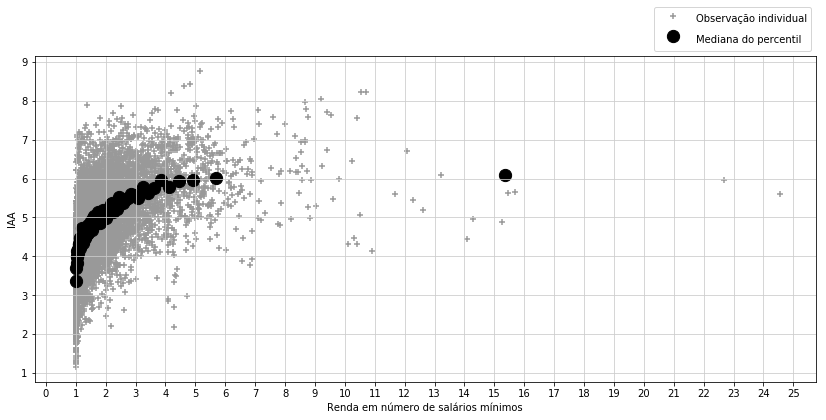

In [9]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df["Renda"], df["IAA"], alpha=1, color="0.6", marker="+")
ax.set(xlabel="Renda em número de salários mínimos", ylabel="IAA")
ax.set(xticks=np.arange(0, 26, 1), yticks=np.arange(0, 11, 1))
ax.set(xbound=(0, 25), ybound=(0,10))
ax.grid(axis="both", color=default_grid_color)

df_22b_median = df.groupby([pd.qcut(df["Renda"], 100, duplicates='drop')])["IAA"].median()
df_22b_median_rst=df_22b_median.reset_index(drop=True)
for i in range(df_22b_median.count()):
    ax.scatter(df_22b_median.index[i].mid, df_22b_median_rst[i], alpha = 1, marker="o", s=150, c="black")
    
# Insere legenda personalizada
ax.legend(["Observação individual", "Mediana do percentil"], loc='lower right', bbox_to_anchor=(1, 1), handlelength=3, handleheight=2) 
    
# Salva figura na pasta dedicada
plt.savefig('Figuras\Q22b.png', bbox_inches='tight', dpi=dpi)

In [10]:
df.groupby([pd.qcut(df["Renda"], 4, duplicates='drop')])["IAA"].describe()

,count,mean,std,min,25%,50%,75%,max
Renda,,,,,,,,
"(0.999, 1.1]",2595.0,3.826599,0.838915,1.161,3.27200,3.8320,4.3760,7.131
"(1.1, 1.36]",2423.0,4.489257,0.758713,2.121,3.99800,4.4530,4.9585,7.390
"(1.36, 2.0]",2490.0,4.900933,0.748361,2.332,4.40225,4.8960,5.3985,7.881
"(2.0, 24.56]",2466.0,5.537210,0.857326,2.185,4.96750,5.5435,6.0980,8.771
